In [1]:
import cvxpy as cp
import numpy as np
import math
import matplotlib.pyplot as plt

In [2]:
x_opt = cp.Variable(20)
c = np.ones(20)
A = np.vstack([np.eye(20), -np.eye(20)])
b = np.ones(1)

obj = cp.Minimize(c @ x_opt)
constraints = [A @ x_opt <= b]
prob = cp.Problem(obj, constraints)
prob.solve()

-19.999999998389498

In [3]:
x_opt.value

array([-1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1.])

In [4]:
def newton_step(x, eta):
    d = 1 / (b - A @ x) 
    D = np.diag(d**2)
    grad = eta * c + A.T @ d
    hess = A.T @ D @ A
    y = np.linalg.solve(hess, grad)
    return x - y


def path_following_ipm(epsilon=1e-4, eta=1):
    m = 40
    x_opt = -np.ones(20)
    x = np.zeros(20)
    T = math.ceil(math.log(m / epsilon, 1 + 1 / (20 * math.sqrt(m))))
    x_arr = np.zeros(T + 3)
    x_arr[0] = np.linalg.norm(x - x_opt)

    for t in range(1, T + 1):
        x = newton_step(x, eta)
        eta *= 1 + 1 / (20 * math.sqrt(m))
        x_arr[t] = np.linalg.norm(x - x_opt)
    
    x = newton_step(x, eta)
    x_arr[T + 1] = np.linalg.norm(x - x_opt)
    x = newton_step(x, eta)
    x_arr[T + 2] = np.linalg.norm(x - x_opt)
    
    return x, x_arr    

In [5]:
x, x_arr = path_following_ipm()

In [6]:
x

array([-0.99999752, -0.99999752, -0.99999752, -0.99999752, -0.99999752,
       -0.99999752, -0.99999752, -0.99999752, -0.99999752, -0.99999752,
       -0.99999752, -0.99999752, -0.99999752, -0.99999752, -0.99999752,
       -0.99999752, -0.99999752, -0.99999752, -0.99999752, -0.99999752])

[]

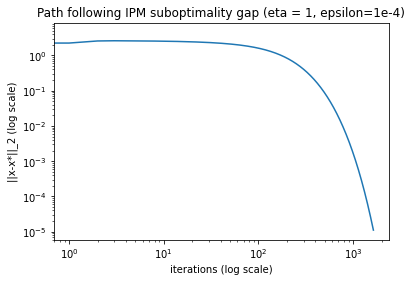

In [7]:
plt.loglog(np.arange(x_arr.size), x_arr)
plt.xlabel('iterations (log scale)')
plt.ylabel('||x-x*||_2 (log scale)')
plt.title('Path following IPM suboptimality gap (eta = 1, epsilon=1e-4)')
plt.plot()